In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("merged_data.csv",index_col=0)
XX = data.drop(columns=['bin'])
yy = data['bin']
y = yy.values
X = XX.values
pd.DataFrame(X,y)

0      1      2     3     4     5       6        7     8         9   \
1   1.04  21.90  50.21  1.17 -0.79  1.31   23.92    37.01  0.40     -1.11   
0   0.47  15.41  23.42  1.09  0.45  1.35  213.35   149.19  0.54     15.30   
1   0.16  21.22  19.09  0.79 -0.01  0.29   17.60   -26.49  0.58      0.00   
0   0.36  24.87  36.80  1.12 -1.85  2.35  111.08   -12.15  0.59     27.45   
0  -1.06  26.04  37.18  1.62 -3.73 -2.03 -179.22  -194.41  0.28    -82.40   
..   ...    ...    ...   ...   ...   ...     ...      ...   ...       ...   
0   2.87  55.25  24.79  4.81  1.48  8.61   88.53  1850.90  0.93  12756.62   
0  -3.46  43.96  24.31  4.96 -7.14 -3.14 -146.26 -4657.47  0.15  -2043.66   
0  -1.78  14.58  13.07  6.75 -4.45 -1.06  -61.29 -3923.85  0.36   -844.57   
1   2.28  27.60  15.79  6.21  0.99  4.41   64.62  5012.92  0.72   1147.26   
1  -1.87  35.75  28.03  5.41 -8.73  1.35 -138.09  -512.47  0.24  -7245.10   

    ...    15     16    17    18     19     20       21      22    23    24  
1   ... -0.35  43.21  0.11  1.11  58.25 -54.00   436.34    24.0   2.0  0.46  
0   ... -0.16  55.63  0.07  0.58  81.58 -13.33   428.13   153.0  18.0  0.07  
1   ... -0.16  50.06 -0.24  0.42  37.14 -62.50   427.95    13.0   6.0  0.05  
0   ... -0.45  50.43  0.02  0.61  47.37 -42.86   422.60   223.0  15.0  0.26  
0   ... -1.25  30.25 -0.24  1.77   7.59 -93.75   421.83   206.0  19.0  0.29  
..  ...   ...    ...   ...   ...    ...    ...      ...     ...   ...   ...  
0   ...  1.23  61.03  0.33  8.47  78.99 -10.48  2732.35  9208.0  16.0  0.02  
0   ... -0.97  37.75 -0.15  3.68  19.40 -75.74  2731.67  4119.0   8.0  0.00  
0   ... -0.04  47.88 -0.05  4.89  19.49 -62.49  2732.36  4753.0  14.0  0.00  
1   ...  2.21  56.56  0.06  4.77  71.53 -22.33  2734.09  4120.0  21.0  0.05  
1   ... -0.15  39.33 -0.14  3.96  43.69 -91.21  2776.13  8057.0  15.0  0.21  

[4638 rows x 25 columns]

Ways to improve model precision addressing different classes' importance in training:
1.feature engineering
2.threshold tuning
3.class_weight balancing
4.use different ensemble methods

In [3]:
from rfWorkflow import evaluate
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1  # You can change this value to any integer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train.shape

(3710, 25)

Add weight tuning and ensemble methods to help deal with precision and class imbalance. Just adjust class_weight ratio to a point where the model would recognize both class to improve is fine.

0:	learn: 0.6654733	total: 2.03ms	remaining: 40.6s
1000:	learn: 0.1635878	total: 1.53s	remaining: 29.1s
2000:	learn: 0.1529919	total: 2.98s	remaining: 26.8s
3000:	learn: 0.1424056	total: 4.43s	remaining: 25.1s
4000:	learn: 0.1326037	total: 5.88s	remaining: 23.5s
5000:	learn: 0.1238473	total: 7.35s	remaining: 22.1s
6000:	learn: 0.1153086	total: 8.8s	remaining: 20.5s
7000:	learn: 0.1079967	total: 10.2s	remaining: 19s
8000:	learn: 0.1014867	total: 11.7s	remaining: 17.5s
9000:	learn: 0.0958582	total: 13.1s	remaining: 16.1s
10000:	learn: 0.0906706	total: 14.6s	remaining: 14.6s
11000:	learn: 0.0865501	total: 16.1s	remaining: 13.1s
12000:	learn: 0.0823530	total: 17.5s	remaining: 11.7s
13000:	learn: 0.0784940	total: 18.9s	remaining: 10.2s
14000:	learn: 0.0750563	total: 20.4s	remaining: 8.74s
15000:	learn: 0.0718820	total: 21.8s	remaining: 7.28s
16000:	learn: 0.0691454	total: 23.3s	remaining: 5.83s
17000:	learn: 0.0664724	total: 24.8s	remaining: 4.37s
18000:	learn: 0.0642367	total: 26.3s	remain

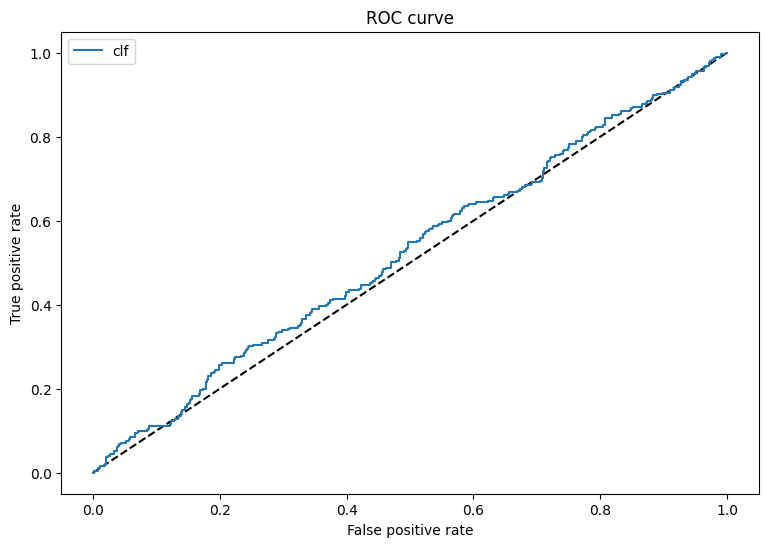

In [13]:
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier

# Define the CatBoost model with initial parameters
catboost_clf = CatBoostClassifier(
    class_weights=[10, 1],  #more weights to 1 class cuz there's less correct cases
    iterations=20000,             # Number of trees (similar to n_estimators)
    learning_rate=0.02,          # Learning rate
    depth=5,                    # Depth of each tree
    l2_leaf_reg=5,
    bagging_temperature=1,
    early_stopping_rounds=50,
    loss_function='Logloss',    # Use 'MultiClass' if it's a multi-class problem
    random_seed=RANDOM_STATE,
    verbose=1000,                  # Suppress output (set to a positive number if you want to see training progress)
)

fit = catboost_clf.fit(X_train, y_train)
evaluate(X_test,y_test,fit)

In [14]:
catboost_clf.save_model('catboost_test.cbm')

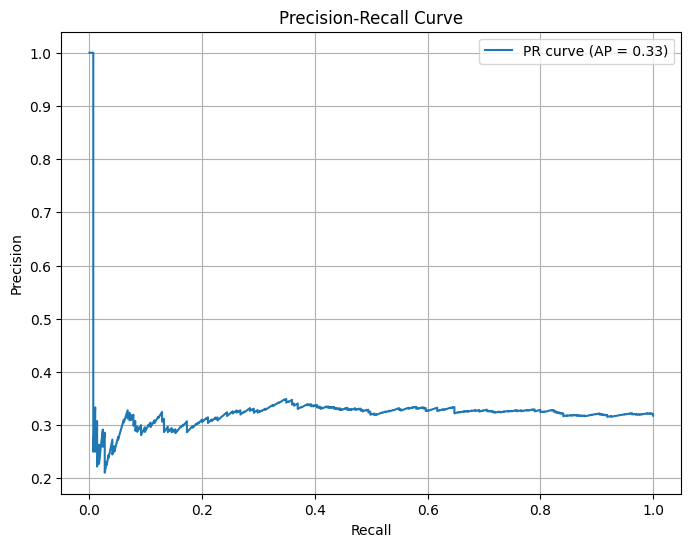

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

# Assuming you have `y_test` (true labels) and `y_pred_proba` (predicted probabilities for the positive class)
# AP is basically the ability to rank positive cases higher than negative cases emobodied through pred_proba, so doesn't matter whcih class u choose
y_pred_proba = catboost_clf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Calculate the area under the precision-recall curve
average_precision = average_precision_score(y_test, y_pred_proba)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {average_precision:.2f})')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


Threshold Tuning: to know which confidence level should we actually use to determine class 1  as positive. It's a tradeoff between precision and recall. If you want more trades to be recognized as positive then less precision vice versa.

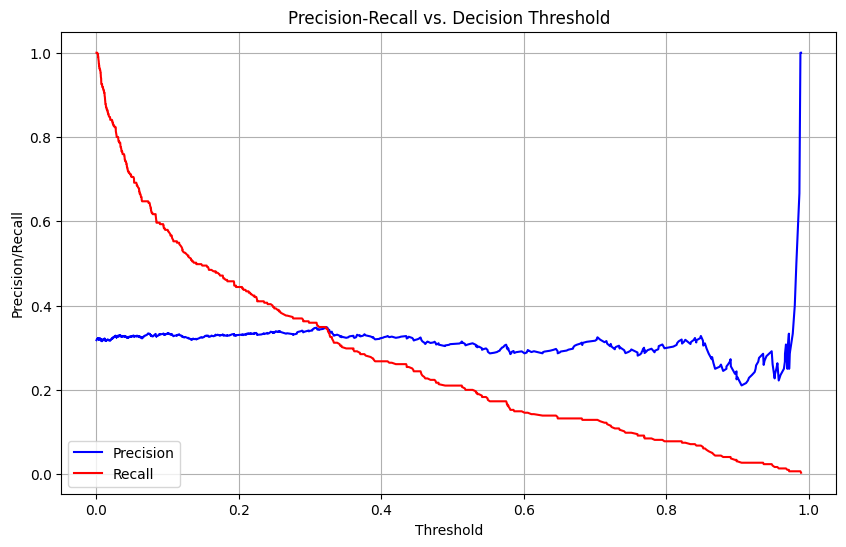

In [12]:
# Get predicted probabilities for the positive class (class `1`)
y_pred_proba = catboost_clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve

# Calculate precision, recall, and thresholds for the positive class
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color="b")
plt.plot(thresholds, recall[:-1], label="Recall", color="r")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision-Recall vs. Decision Threshold")
plt.legend()
plt.grid()
plt.show()



In [13]:
# Choose a custom threshold (e.g., 0.3)
#Now you can see the difference compared with the first report above
threshold = 0.3
y_pred_custom = (y_pred_proba >= threshold).astype(int)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_custom))


              precision    recall  f1-score   support

           0       0.69      0.68      0.68       633
           1       0.34      0.36      0.35       295

    accuracy                           0.58       928
   macro avg       0.52      0.52      0.52       928
weighted avg       0.58      0.58      0.58       928



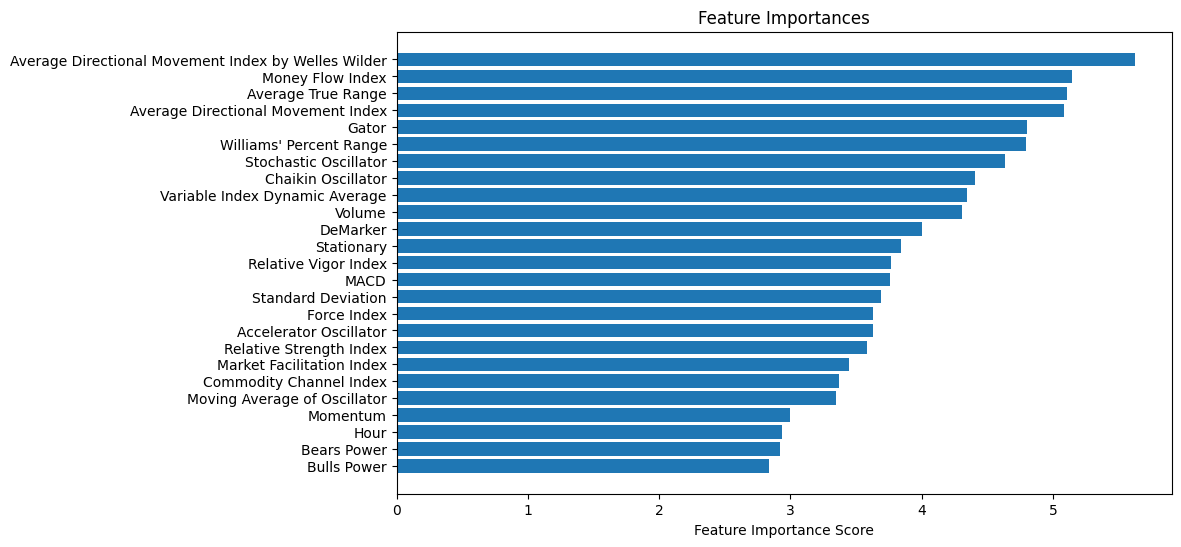

In [14]:
import matplotlib.pyplot as plt
feature_importance = catboost_clf.get_feature_importance()
feature_names = XX.columns
feature_importances_sorted = sorted(
    zip(feature_importance, feature_names), 
    key=lambda x: x[0], 
    reverse=True
)

# Select the top 10 features
importances = feature_importances_sorted[0:27]
scores, names = zip(*importances)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(names,scores, align='center')
plt.xlabel("Feature Importance Score")
plt.title("Feature Importances")
plt.gca().invert_yaxis()  # Highest importance on top
plt.show()

In [4]:
from catboost import CatBoostClassifier
catboost = CatBoostClassifier(
    iterations=20000,             # Number of trees (similar to n_estimators)
    learning_rate=0.02,          # Learning rate
    depth=5,                    # Depth of each tree
    l2_leaf_reg=5,
    bagging_temperature=1,
    #rsm=0.5,
    early_stopping_rounds=50,
    loss_function='Logloss',    # Use 'MultiClass' if it's a multi-class problem
    random_seed=RANDOM_STATE,
    verbose=1000,                  # Suppress output (set to a positive number if you want to see training progress)
)

fit = catboost.fit(X, y)

0:	learn: 0.6906230	total: 62.4ms	remaining: 20m 48s
1000:	learn: 0.4769070	total: 1.65s	remaining: 31.2s
2000:	learn: 0.3635238	total: 3.35s	remaining: 30.1s
3000:	learn: 0.2839672	total: 4.94s	remaining: 28s
4000:	learn: 0.2250109	total: 6.53s	remaining: 26.1s
5000:	learn: 0.1803368	total: 8.11s	remaining: 24.3s
6000:	learn: 0.1453583	total: 9.73s	remaining: 22.7s
7000:	learn: 0.1178125	total: 11.3s	remaining: 20.9s
8000:	learn: 0.0965345	total: 12.9s	remaining: 19.3s
9000:	learn: 0.0799128	total: 14.4s	remaining: 17.6s
10000:	learn: 0.0670186	total: 16s	remaining: 16s
11000:	learn: 0.0568618	total: 17.6s	remaining: 14.4s
12000:	learn: 0.0485805	total: 19.2s	remaining: 12.8s
13000:	learn: 0.0420179	total: 20.7s	remaining: 11.2s
14000:	learn: 0.0368391	total: 22.3s	remaining: 9.56s
15000:	learn: 0.0326255	total: 23.8s	remaining: 7.95s
16000:	learn: 0.0290079	total: 25.4s	remaining: 6.36s
17000:	learn: 0.0259626	total: 26.9s	remaining: 4.75s
18000:	learn: 0.0233919	total: 28.5s	remaini

In [5]:
catboost.save_model('catboost.cbm')

In [ ]:
#If you were to output the params, they should be trained on the whole dataset so need to retrain
from catboost import CatBoostClassifier
import json
from collections import defaultdict

# Load and parse model JSON
model = CatBoostClassifier()
model.load_model("catboost.cbm")
model.save_model("model.json", format="json")

with open("model.json", "r") as file:
    model_data = json.load(file)
# Compute tree depth as the number of splits for each tree
tree_depth = [len(tree['splits']) for tree in model_data['oblivious_trees']]
# Adjust parsing based on keys found in split
feature_borders = defaultdict(set)
for tree in model_data['oblivious_trees']:
    for split in tree['splits']:
        feature_key = split.get('feature_index', split.get('float_feature_index'))  # Adjust key if necessary
        border = split.get('border')
        if feature_key is not None and border is not None:
            feature_borders[feature_key].add(border)

# Process borders, counts, etc., as previously described
borders = []
border_indices = {}
current_index = 0
for feature_index in range(max(feature_borders) + 1):
    sorted_borders = sorted(feature_borders[feature_index])
    for border in sorted_borders:
        borders.append(border)
        border_indices[(feature_index, border)] = current_index
        current_index += 1

border_counts = [len(feature_borders[i]) for i in range(max(feature_borders) + 1)]

# Adjust TreeSplits using border indices
tree_splits = [
    border_indices[(split.get('feature_index', split.get('float_feature_index')), split['border'])]
    for tree in model_data['oblivious_trees']
    for split in tree['splits']
]

# Extract LeafValues
leaf_values = [leaf for tree in model_data['oblivious_trees'] for leaf in tree['leaf_values']]

# Format these lists into MQL-style array initializations
mql_tree_depth = f"uint TreeDepth[] = {{ {', '.join(map(str, tree_depth))} }};"
mql_tree_splits = f"uint TreeSplits[] = {{ {', '.join(map(str, tree_splits))} }};"
mql_border_counts = f"uint BorderCounts[] = {{ {', '.join(map(str, border_counts))} }};"
mql_borders = f"float Borders[] = {{ {', '.join(map(str, borders))} }};"
mql_leaf_values = f"double LeafValues[] = {{ {', '.join(map(str, leaf_values))} }};"

print(mql_tree_depth)
print(mql_tree_splits)
print(mql_border_counts)
print(mql_borders)
print(mql_leaf_values)

In [6]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.load_model("catboost.cbm")

In [7]:
#No need to use the original embargo and purged cuz the way I saved data from MT5 is already event outcome based, not start time based
from cvFin import calculate_cross_validation_score
score = calculate_cross_validation_score(model,X,y,cv = 10, scoring= "neg_log_loss", n_jobs = 8, verbose= 100)
score

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
[CV] START .....................................................................
0:	learn: 0.6906395	total: 53.9ms	remaining: 17m 57s
0:	learn: 0.6906874	total: 56.8ms	remaining: 18m 55s
[CV] START .....................................................................
0:	learn: 0.6905573	total: 58.7ms	remaining: 19m 33s
0:	learn: 0.6906245	total: 58.9ms	remaining: 19m 38s
0:	learn: 0.6906434	total: 55.9ms	remaining: 18m 37s
0:	learn: 0.

{'score': array([-0.97148655, -1.25263677, -1.02043177, -1.06770248, -0.97339545,
        -0.88611439, -0.83877111, -0.95682533, -1.02443847, -1.1385681 ])}